# Event inspection tools
Last modification: 2023.06.29.
Update note: Include shear traction image

# Initiation

In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from faultoutputs_image import *
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'
# prefix = 'Thakur20_various_fractal_profiles/v6_ab2'
# prefix = 'Thakur20_various_fractal_profiles/v6_Dc1_long'

# ----------
save_dir = 'models/'+prefix
plot_dir = 'plots/'+prefix

print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
print('Load saved data: %s/const_params.npy'%(save_dir))
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

# ----------
y,Hs,a,b,a_b,tau0,sigma0,Dc,others = ch.load_parameter(prefix)

Load saved data: models/Thakur20_various_fractal_profiles/v6_ab2_Dc2/outputs
Load saved data: models/Thakur20_various_fractal_profiles/v6_ab2_Dc2/outputs_depthinfo
Load saved data: models/Thakur20_various_fractal_profiles/v6_ab2_Dc2/const_params.npy
Fractal normal stress model ver.6
Fractal a-b model ver.2
Fractal Dc model ver.2
Using file fractal_snpre_06
Using file fractal_ab_02
Using file fractal_Dc_02


## Load variables

In [2]:
from cumslip_compute import *

time = np.array([outputs[i][:,0] for i in np.argsort(abs(dep))])

Vths = 1e-1
Vlb = 0
dt_interm = 0
cuttime = 0
# mingap = 60
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5

# cumslip_outputs = old_compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,mingap)
cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm)
tstart,tend = cumslip_outputs[0][0],cumslip_outputs[0][1]
rupture_length,avD,system_wide,partial_rupture = analyze_events(cumslip_outputs,rths)
evdep = cumslip_outputs[1][1]
spin_up_idx = compute_spinup(outputs,dep,cuttime,cumslip_outputs,10)[-1]


time = np.array([outputs[i][:,0] for i in np.argsort(abs(dep))])
sr = abs(np.array([outputs[i][:,4] for i in np.argsort(abs(dep))]))
shearT = abs(np.array([outputs[i][:,3] for i in np.argsort(abs(dep))]))
z = np.sort(abs(dep))

print('Total number of events: %d / Spin-up index: %d'%(len(tstart),spin_up_idx))
print('System-wide indexes:',system_wide)

Cumulative slip vs. Depth plot >>> No cutting
Slip rate > 1e-01
Spin-up applied after slip > 10.00 m
Total number of events: 154 / Spin-up index: 38
System-wide indexes: [  6  11  19  32  39  51  58  72  81  92  99 112 119 131 136 143]


## Figure properties

In [3]:
plot_in_timestep = True; plot_in_sec = False

def gen_cmap_sr(vmin=1e-12,vmax=1e1,Vths=1e-2):
    if False:
        cm = mpl.colormaps['RdYlBu_r']
        col_list = [cm(i)[0:3] for i in [0.15,0.9]]
        col_list.insert(0,(0,0,0))
        col_list.insert(2,mpl.colormaps['jet'](0.67))
        col_list.append(mpl.colormaps['turbo'](0))
        float_list = [0,0.2,0.7,0.85,1]
        cmap_n = mp.get_continuous_cmap(col_list,input_hex=False,float_list=float_list)
    if False:
        cm = mpl.colormaps['RdYlBu_r']
        col_list = [cm(i)[0:3] for i in [0.15,0.2,0.8,0.9]]
        col_list.insert(0,(0,0,0))
        col_list.insert(3,mpl.colormaps['jet'](0.67))
        col_list.append(mpl.colormaps['turbo'](0))
        float_list = [0,0.2,0.4,mpl.colors.LogNorm(vmin,vmax)(Vths),0.85,0.92,1]
        cmap_n = mp.get_continuous_cmap(col_list,input_hex=False,float_list=float_list)
    if True:
        cm = mpl.colormaps['RdYlBu_r']
        col_list = [cm(i)[0:3] for i in [0.15,0.5,0.8,0.9]]
        col_list = [cm(0.15)[0:3],mpl.colormaps['jet'](0.67),cm(0.8)[0:3],cm(0.9)[0:3]]
        col_list.insert(0,(0,0,0))
        col_list.insert(3,mpl.colors.to_rgb('w'))
        col_list.append(mpl.colormaps['turbo'](0))
        # float_list = [0,mpl.colors.LogNorm(vmin,vmax)(params.item().get('Vp')),mpl.colors.LogNorm(vmin,vmax)(params.item().get('V0')),mpl.colors.LogNorm(vmin,vmax)(Vths),0.85,0.92,1]
        float_list = [0,mpl.colors.LogNorm(vmin,vmax)(params.item().get('Vp')),mpl.colors.LogNorm(vmin,vmax)(params.item().get('V0'))]
        [float_list.append(k) for k in np.linspace(mpl.colors.LogNorm(vmin,vmax)(Vths),1,4)]
        cmap_n = mp.get_continuous_cmap(col_list,input_hex=False,float_list=float_list)
    cb_label = 'Slip Rate [m/s]'
    return cmap_n,cb_label

def gen_cmap_tau(vmin,vmax):
    import cmcrameri.cm as cram
    cm = cram.vik
    # col_list = [cm(i) for i in np.linspace(0,1,7)]
    col_list = [cm(i) for i in np.linspace(0,1,6)]
    col_list.insert(3,mpl.colors.to_rgb('w'))
    float_list = [mpl.colors.Normalize(vmin,vmax)(i) for i in np.linspace(vmin,0,4)]
    [float_list.append(mpl.colors.Normalize(vmin,vmax)(k)) for k in np.linspace(0,vmax,4)[1:]]
    cmap_n = mp.get_continuous_cmap(col_list,input_hex=False,float_list=float_list)
    cb_label = 'Shear Traction Change [MPa]'
    return cmap_n,cb_label

In [ ]:
# X,Y,var,lab = get_var(sliprate=True,shearT=False,normalT=False,state_var=False,outputs=outputs,dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)
X,Y,var,lab = get_var(sliprate=False,shearT=True,normalT=False,state_var=False,outputs=outputs,dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)
var = np.array([var[i,:]-var[i,0] for i in range(var.shape[0])])

print(np.quantile(var,0.95),np.quantile(var,0.96),np.quantile(var,0.97),np.quantile(var,0.98),np.quantile(var,0.99),var.max())
print(np.quantile(var,0.05),np.quantile(var,0.04),np.quantile(var,0.03),np.quantile(var,0.02),np.quantile(var,0.01),var.min())

# Plot the whole cycle

In [ ]:
save_on = 1
# X,Y,var,lab = get_var(sliprate=True,shearT=False,normalT=False,state_var=False,outputs=outputs,dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)
X,Y,var,lab = get_var(sliprate=False,shearT=True,normalT=False,state_var=False,outputs=outputs,dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)
its_all = np.array([np.argmin(abs(time[0]-t)) for t in tstart])

plt.rcParams['font.size'] = '27'
plt.figure(figsize=(20.6,11))

if lab == 'sliprate':
    vmin = 1e-12; vmax = 1e1
    cmap_n,cb_label = gen_cmap_sr(vmin,vmax,Vths)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,norm=mpl.colors.LogNorm(vmin,vmax))
    acolor = 'w'
elif lab == 'shearT':
    var = np.array([var[i,:]-var[i,0] for i in range(var.shape[0])])
    # vmin = var.min(); vmax = var.max()
    vmin = -5; vmax = 5
    cmap_n,cb_label = gen_cmap_tau(vmin,vmax)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,vmin=vmin,vmax=vmax)
    acolor = 'k'
    
plt.colorbar(cb,extend='both').set_label(cb_label,fontsize=30,rotation=270,labelpad=30)

ver_info = ch.version_info(prefix)

xl = plt.gca().get_xlim()
if len(ver_info) > 0:
    if ver_info[:2] == '+ ':
        ver_info = ver_info[2:]
    plt.text(xl[1]*0.025,Hs[0]*0.975,ver_info,color=acolor,fontsize=45,fontweight='bold',ha='left',va='bottom')
plt.scatter(its_all,evdep,s=200,marker='*',facecolor='w',edgecolor='k',lw=1.5,zorder=3)
plt.hlines(y=Hs[1],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[1]+Hs[2],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[-1],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.xlim(0,xl[1])
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.ylabel('Depth [km]',fontsize=30)
if plot_in_timestep:
    plt.xlabel('Timesteps',fontsize=30)
elif plot_in_sec:        
    plt.xlabel('Time [s]',fontsize=30)
else:        
    plt.xlabel('Time [yrs]',fontsize=30)

plt.tight_layout()
if save_on:
    if plot_in_timestep:
        plt.savefig('%s/%s_image_timestep.png'%(save_dir,lab),dpi=300)
    else:
        plt.savefig('%s/%s_image.png'%(save_dir,lab),dpi=300)
plt.show()

## Zoom in

Plot in time steps


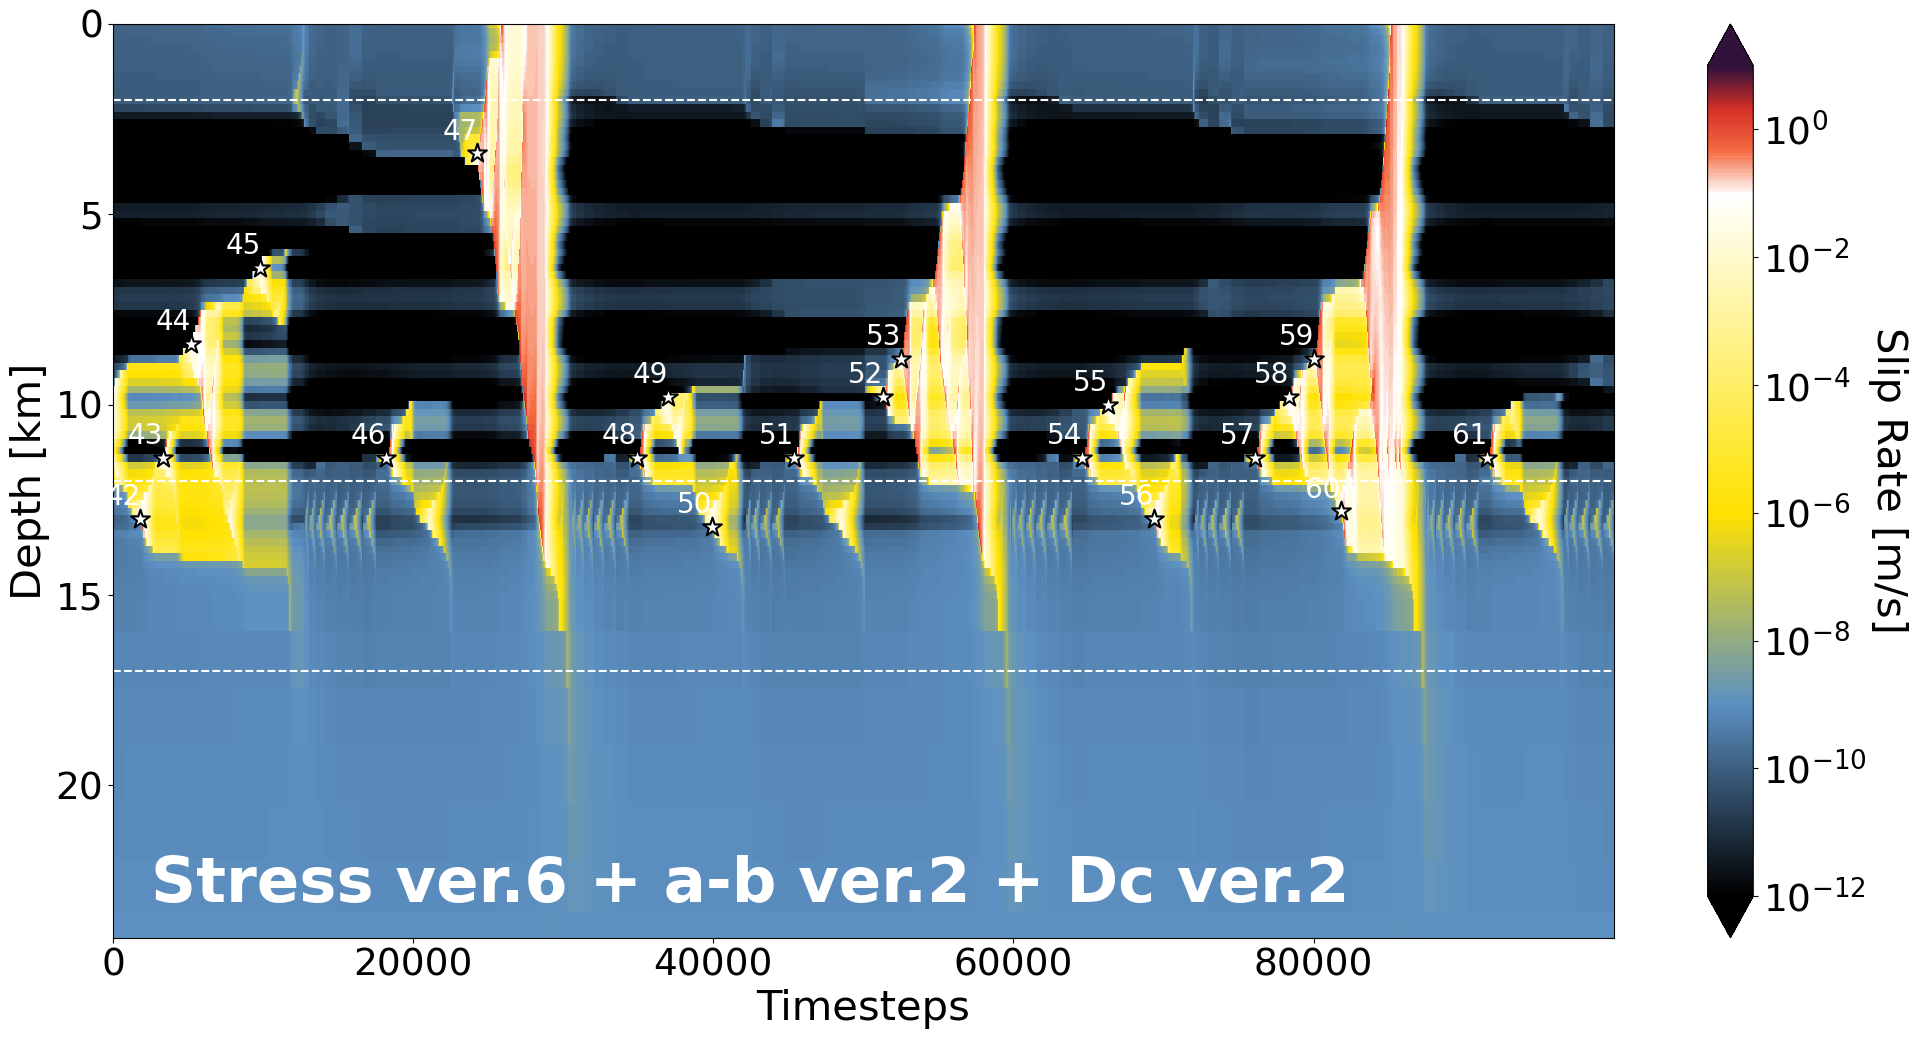

In [6]:
save_on = 1
tsmin,tsmax = int(2e5),int(3e5)
# tsmin,tsmax = int(4e4),int(6e4)
X,Y,var,lab = get_var(sliprate=True,shearT=False,normalT=False,state_var=False,outputs=outputs[:,tsmin:tsmax,:],dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)
# X,Y,var,lab = get_var(sliprate=False,shearT=True,normalT=False,state_var=False,outputs=outputs[:,tsmin:tsmax,:],dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)
its_all = np.array([np.argmin(abs(time[0]-t)) for t in tstart]) - tsmin

plt.rcParams['font.size'] = '27'
plt.figure(figsize=(20.6,11))

if lab == 'sliprate':
    vmin = 1e-12; vmax = 1e1
    cmap_n,cb_label = gen_cmap_sr(vmin,vmax,Vths)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,norm=mpl.colors.LogNorm(vmin,vmax))
    acolor = 'w'
elif lab == 'shearT':
    var = np.array([var[i,:]-var[i,0] for i in range(var.shape[0])])
    # vmin = var.min(); vmax = var.max()
    vmin = -5; vmax = 5
    cmap_n,cb_label = gen_cmap_tau(vmin,vmax)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,vmin=vmin,vmax=vmax)
    acolor = 'k'
    
plt.colorbar(cb,extend='both').set_label(cb_label,fontsize=30,rotation=270,labelpad=30)

ver_info = ch.version_info(prefix)

xl = plt.gca().get_xlim()
if len(ver_info) > 0:
    if ver_info[:2] == '+ ':
        ver_info = ver_info[2:]
    plt.text(xl[1]*0.025,Hs[0]*0.975,ver_info,color=acolor,fontsize=45,fontweight='bold',ha='left',va='bottom')
plt.scatter(its_all,evdep,s=200,marker='*',facecolor='w',edgecolor='k',lw=1.5,zorder=3)
for k in range(len(its_all)):
    if its_all[k]>=0 and its_all[k]<=tsmax-tsmin:
        plt.text(its_all[k],evdep[k]-0.2,'%d'%(k),color=acolor,fontsize=20,ha='right',va='bottom')
plt.hlines(y=Hs[1],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[1]+Hs[2],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[-1],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.xlim(0,xl[1])
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.ylabel('Depth [km]',fontsize=30)
if plot_in_timestep:
    plt.xlabel('Timesteps',fontsize=30)
elif plot_in_sec:        
    plt.xlabel('Time [s]',fontsize=30)
else:        
    plt.xlabel('Time [yrs]',fontsize=30)

plt.tight_layout()
if save_on:
    if plot_in_timestep:
        plt.savefig('%s/zoom_%s_image_timestep_update.png'%(save_dir,lab),dpi=300)
    else:
        plt.savefig('%s/zoom_%s_image_update.png'%(save_dir,lab),dpi=300)

# Zoom into a specific coseismic period

In [7]:
its_all = [np.argmin(abs(time[0]-t)) for t in tstart]
ite_all = [np.argmin(abs(time[0]-t)) for t in tend]
iev = 47
# iev = 86
its,ite = its_all[iev],ite_all[iev]
buffer1 = 1000
# buffer2 = 500
buffer2 = buffer1

X,Y,var,lab = get_var(sliprate=True,shearT=False,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)
# X,Y,var,lab = get_var(sliprate=False,shearT=True,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)

Plot in time steps


## Image plot

In [ ]:
save_on = 1

plt.rcParams['font.size'] = '27'
plt.figure(figsize=(16,11))

if lab == 'sliprate':
    vmin = 1e-12; vmax = 1e1
    cmap_n,cb_label = gen_cmap_sr(vmin,vmax,Vths)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,norm=mpl.colors.LogNorm(vmin,vmax))
    acolor = 'w'
elif lab == 'shearT':
    var = np.array([var[i,:]-var[i,0] for i in range(var.shape[0])])
    # vmin = var.min(); vmax = var.max()
    vmin = -5; vmax = 5
    cmap_n,cb_label = gen_cmap_tau(vmin,vmax)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,vmin=vmin,vmax=vmax)
    acolor = 'k'
    
plt.colorbar(cb,extend='both').set_label(cb_label,fontsize=30,rotation=270,labelpad=30)

xl = plt.gca().get_xlim()
plt.scatter(its_all-(its-buffer1),evdep,s=200,marker='*',facecolor='w',edgecolor='k',lw=1.5,zorder=3)
plt.vlines(x=its-(its-buffer1),ymin=0,ymax=Hs[0],linestyles='--',color=acolor,lw=1.5)
plt.vlines(x=ite-(its-buffer1),ymin=0,ymax=Hs[0],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[1],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[1]+Hs[2],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[-1],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.text(its-(its-buffer1)+xl[1]*0.025,23,'Event %d'%(iev),fontsize=30,fontweight='bold',color=acolor,ha='left',va='bottom')
plt.xlim(0,xl[1])
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.ylabel('Depth [km]',fontsize=30)
if plot_in_timestep:
    plt.xlabel('Timesteps',fontsize=30)
elif plot_in_sec:        
    plt.xlabel('Time [s]',fontsize=30)
else:        
    plt.xlabel('Time [yrs]',fontsize=30)

plt.tight_layout()
if save_on:
    if plot_in_timestep:
        plt.savefig('%s/zoom_%s_image_timestep_ev%d.png'%(save_dir,lab,iev),dpi=300)
    else:
        plt.savefig('%s/zoom_%s_image_ev%d.png'%(save_dir,lab,iev),dpi=300)


## Peak variable along the fault

In [ ]:
def show_zoom(ax,time,its,buffer1,ite,buffer2,lab,col='k'):
    if lab == 'sliprate':
        var = np.log10(np.max(sr[:,its-buffer1:ite+buffer2],axis=0))
        ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    elif lab == 'shearT':
        var = abs(np.max(shearT[:,its-buffer1:ite+buffer2],axis=0))
        ylab = 'Peak Shear Stress [MPa])'
    t = time[0][its-buffer1:ite+buffer2]
    ax.plot(t,var,col,lw=2)
    ax.set_xlabel('Time [s]',fontsize=17)
    ax.hlines(y=-2,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
    ax.set_ylabel(ylab,fontsize=17)
    ax.grid(True,alpha=0.5)
    return t,var

### Slip rate

In [ ]:
save_on = 0
yl = [-4,2]
width = np.round(time[0][ite]-time[0][its])
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(8,6))
t,var=show_zoom(ax,time,its,buffer1,ite,buffer2,lab)
ax.text(time[0][its]+width/18,yl[1]-(yl[1]-yl[0])*0.05,'Event %d'%(iev),fontsize=15,fontweight='bold',ha='left',va='top')
plt.vlines(x=[time[0][its],time[0][ite]],ymin=yl[0],ymax=yl[1],linestyles='--',color='0.62',lw=2)
ax.set_xlim(time[0][its]-width/6,time[0][ite]+width/6)
ax.set_ylim(yl)
plt.tight_layout()
if save_on:
    if lab == 'sliprate':
        plt.savefig('%s/PSR_zoom_event_%d.png'%(save_dir,iev),dpi=300)
    elif lab == 'shearT':
        plt.savefig('%s/PTAU_zoom_event_%d.png'%(save_dir,iev),dpi=300)
plt.show()


In [ ]:
var = np.log10(np.max(sr[:,its:ite],axis=0))
var

### Shear stress

In [ ]:
save_on = 0
yl = [-4,2]
width = np.round(time[0][ite]-time[0][its])
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(8,6))
t,var=show_zoom(ax,time,its,buffer1,ite,buffer2,lab)
ax.text(time[0][its]+width/18,yl[1]-(yl[1]-yl[0])*0.05,'Event %d'%(iev),fontsize=15,fontweight='bold',ha='left',va='top')
plt.vlines(x=[time[0][its],time[0][ite]],ymin=yl[0],ymax=yl[1],linestyles='--',color='0.62',lw=2)
ax.set_xlim(time[0][its]-width/6,time[0][ite]+width/6)
ax.set_ylim(yl)
plt.tight_layout()
if save_on:
    if lab == 'sliprate':
        plt.savefig('%s/PSR_zoom_event_%d.png'%(save_dir,iev),dpi=300)
    elif lab == 'shearT':
        plt.savefig('%s/PTAU_zoom_event_%d.png'%(save_dir,iev),dpi=300)
plt.show()


## Image plot with peak slip rate series

Plot in time [s]


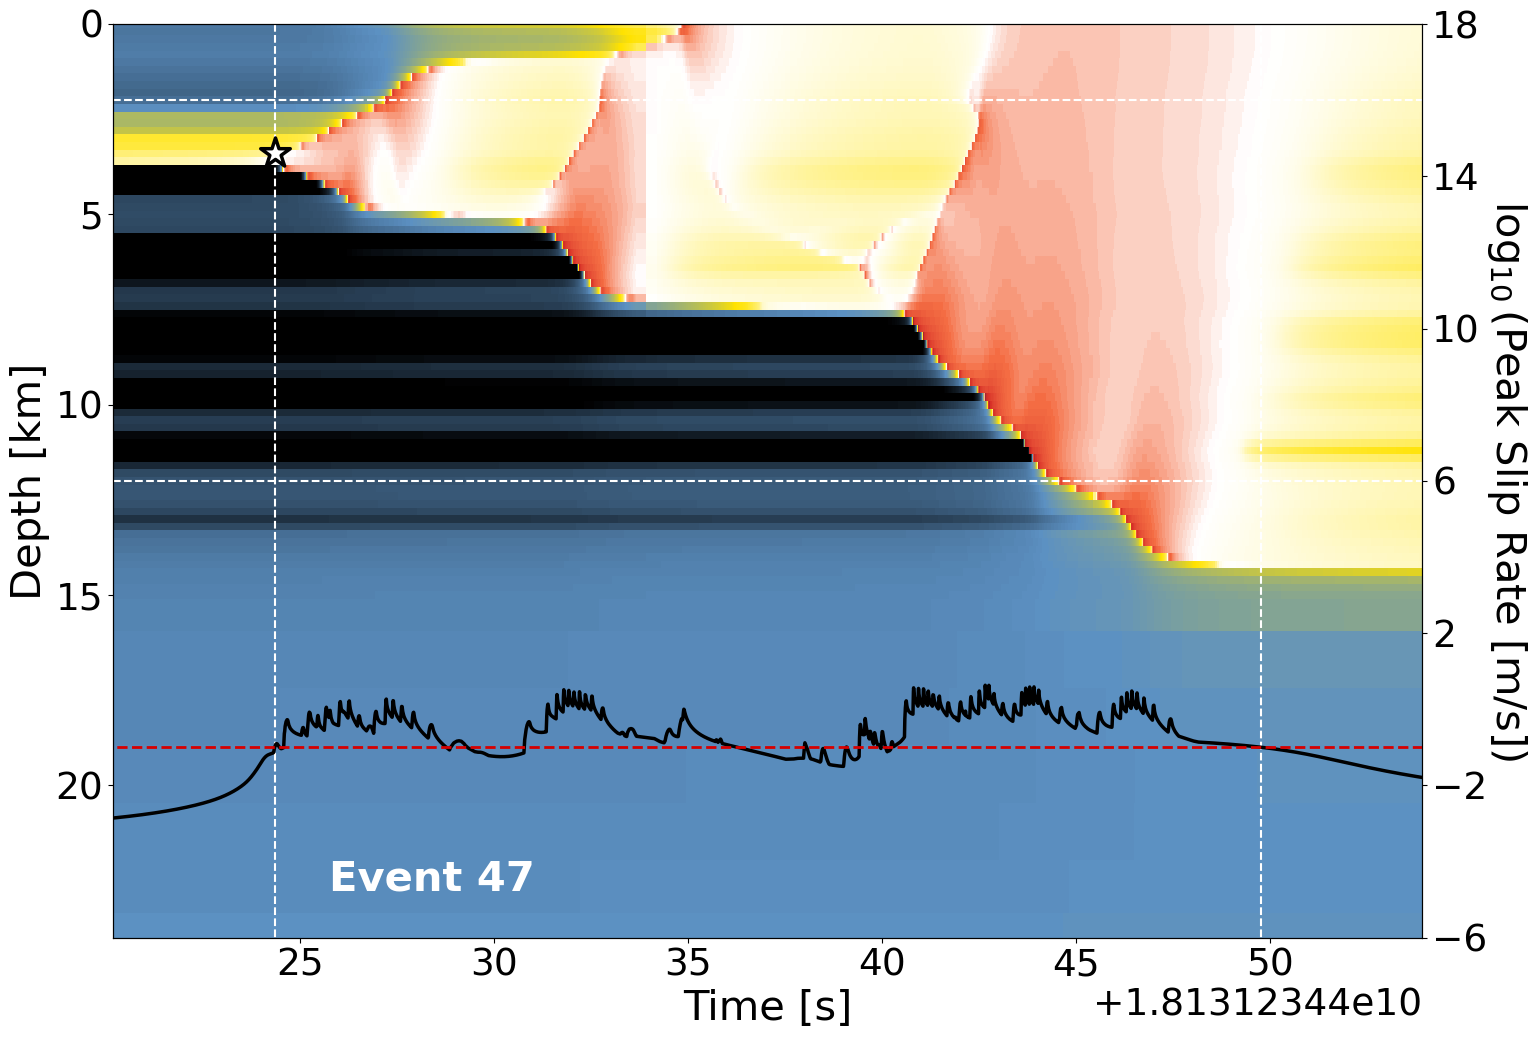

In [8]:
save_on = 1
X,Y,var,lab = get_var(sliprate=True,shearT=False,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=False,plot_in_sec=True)
# X,Y,var,lab = get_var(sliprate=False,shearT=True,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=False,plot_in_sec=True)

plt.rcParams['font.size'] = '27'
fig,ax=plt.subplots(figsize=(16,11))

if lab == 'sliprate':
    vmin = 1e-12; vmax = 1e1
    cmap_n,cb_label = gen_cmap_sr(vmin,vmax,Vths)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,norm=mpl.colors.LogNorm(vmin,vmax))
    acolor = 'w'
elif lab == 'shearT':
    var = np.array([var[i,:]-var[i,0] for i in range(var.shape[0])])
    # vmin = var.min(); vmax = var.max()
    vmin = -5; vmax = 5
    cmap_n,cb_label = gen_cmap_tau(vmin,vmax)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,vmin=vmin,vmax=vmax)
    acolor = 'k'

width = np.round(time[0][ite]-time[0][its])
xl = time[0][its]-width/6,time[0][ite]+width/6
# xl = time[0][its-int(buffer1)],time[0][ite+int(buffer2/7)]
plt.scatter(time[0][its_all],evdep,s=500,marker='*',facecolor='w',edgecolor='k',lw=2.5,zorder=3)
plt.vlines(x=[time[0][its],time[0][ite]],ymin=0,ymax=Hs[0],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[1],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
# plt.hlines(y=Hs[1]+Hs[2],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[-1],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.text(time[0][its]+width/18,23,'Event %d'%(iev),fontsize=30,fontweight='bold',color=acolor,ha='left',va='bottom')
plt.xlim(xl)
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.ylabel('Depth [km]',fontsize=30)
plt.xlabel('Time [s]',fontsize=30)

ax2 = ax.twinx()
if lab == 'sliprate':
    var = np.log10(np.max(sr[:,its-buffer1:ite+buffer2],axis=0))
    ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    # hy = -2
    hy = np.log10(Vths)
    ytick_inc = 4
    yl = [-6,18]
elif lab == 'shearT':
    var = abs(shearT[:,its-buffer1:ite+buffer2])
    var = np.array([var[i,:]-shearT[i,0] for i in range(var.shape[0])])
    var = np.max(var,axis=0)
    ylab = 'Peak Shear Stress Change [MPa])'
    hy = []
    ytick_inc = 10
    # yl = [30,100]
    yl = [-5,65]
t = time[0][its-buffer1:ite+buffer2]
ax2.plot(t,var,'k',lw=2.5)
ax2.hlines(y=hy,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
ax2.set_ylabel(ylab,fontsize=30,rotation=270,labelpad=30)
ax2.set_yticks(np.arange(yl[0],yl[1]+ytick_inc,ytick_inc))
ax2.set_ylim(yl)

plt.tight_layout()
if save_on:
    plt.savefig('%s/withPEAK_zoom_%s_image_ev%d_tmp.png'%(save_dir,lab,iev),dpi=300)


# Zoom into interseismic period

In [ ]:
its_all = [np.argmin(abs(time[0]-t)) for t in tstart]
ite_all = [np.argmin(abs(time[0]-t)) for t in tend]
# iev1,iev2 = 48,51
iev1,iev2 = 58,59
its,ite = ite_all[iev1],its_all[iev2]
buffer1 = 20000
# buffer2 = 10000
buffer2 = buffer1

X,Y,var,lab = get_var(sliprate=True,shearT=False,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)

## Image plot with peak slip rate

In [ ]:
save_on = 1
# X,Y,var,lab = get_var(sliprate=True,shearT=False,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=False,plot_in_sec=True)
X,Y,var,lab = get_var(sliprate=False,shearT=True,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=False,plot_in_sec=True)

plt.rcParams['font.size'] = '27'
fig,ax=plt.subplots(figsize=(16,11))

if lab == 'sliprate':
    vmin = 1e-12; vmax = 1e1
    cmap_n,cb_label = gen_cmap_sr(vmin,vmax,Vths)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,norm=mpl.colors.LogNorm(vmin,vmax))
    acolor = 'w'
elif lab == 'shearT':
    var = np.array([var[i,:]-var[i,0] for i in range(var.shape[0])])
    # vmin = var.min(); vmax = var.max()
    vmin = -5; vmax = 5
    cmap_n,cb_label = gen_cmap_tau(vmin,vmax)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,vmin=vmin,vmax=vmax)
    acolor = 'k'

width = np.round(time[0][ite]-time[0][its])
xl = time[0][its]-width/6,time[0][ite]+width/6
# xl = time[0][its-int(buffer1)],time[0][ite+int(buffer2/7)]
plt.scatter(time[0][its_all],evdep,s=500,marker='*',facecolor='w',edgecolor='k',lw=2.5,zorder=3)
plt.vlines(x=[time[0][its],time[0][ite]],ymin=0,ymax=Hs[0],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[1],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
# plt.hlines(y=Hs[1]+Hs[2],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[-1],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.text(time[0][its]-width/150,21.5,'Event %d'%(iev1),fontsize=30,fontweight='bold',color=acolor,ha='right',va='bottom',rotation=90)
plt.text(time[0][ite]+width/150,21.5,'Event %d'%(iev2),fontsize=30,fontweight='bold',color=acolor,ha='left',va='bottom',rotation=90)
plt.xlim(xl)
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.ylabel('Depth [km]',fontsize=30)
plt.xlabel('Time [s]',fontsize=30)

ax2 = ax.twinx()
if lab == 'sliprate':
    var = np.log10(np.max(sr[:,its-buffer1:ite+buffer2],axis=0))
    ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    hy = -2
    ytick_inc = 4
    yl = [-10,14]
elif lab == 'shearT':
    var = abs(np.max(shearT[:,its-buffer1:ite+buffer2],axis=0))
    ylab = 'Peak Shear Stress [MPa])'
    hy = []
    ytick_inc = 10
    yl = [30,100]
t = time[0][its-buffer1:ite+buffer2]
ax2.plot(t,var,'k',lw=2.5)
ax2.hlines(y=hy,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
ax2.set_ylabel(ylab,fontsize=30,rotation=270,labelpad=30)
ax2.set_yticks(np.arange(yl[0],yl[1]+ytick_inc,ytick_inc))
ax2.set_ylim(yl)

plt.tight_layout()
if save_on:
    plt.savefig('%s/withPEAK_zoom_%s_image_interevent_%d_%d.png'%(save_dir,lab,iev1,iev2),dpi=300)
plt.show()

## Peak variable along the fault

In [ ]:
from scipy.signal import find_peaks
save_on = 1

def show_zoom(ax,time,its,buffer1,ite,buffer2,lab,col='k'):
    if lab == 'sliprate':
        var = np.max(sr[:,its-buffer1:ite+buffer2],axis=0)
    elif lab == 'shearT':
        var = np.max(shearT[:,its-buffer1:ite+buffer2],axis=0)
    t = time[0][its-buffer1:ite+buffer2]/ch.yr2sec
    peaks, _ =find_peaks(var,distance=250,height=4e-9)
    ax.plot(t,np.log10(var),col,lw=2)
    sss = np.where(t[peaks]>time[0][its+1000]/ch.yr2sec)[0][0]
    sse = np.where(t[peaks]<time[0][ite]/ch.yr2sec)[0][-1]
    ax.scatter(t[peaks[sss:sse]],np.log10(var[peaks[sss:sse]]),10,color=mp.myburgundy,zorder=3)
    if len(t[peaks[sss:sse]]) >= 2:
        print('Recurrence interval in yrs:',np.diff(t[peaks[sss:sse]]))
    # ax.set_xlabel('Time [s]',fontsize=17)
    ax.set_xlabel('Time [yr]',fontsize=17)
    ax.hlines(y=-2,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
    ax.set_ylabel(r'$\log_{10}$(Peak Slip Rate [m/s])',fontsize=17)
    ax.grid(True,alpha=0.5)
    return t,var


yl = [-10,2]
width = np.round(time[0][ite]-time[0][its])/ch.yr2sec
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(8,6))
t,var=show_zoom(ax,time,its,buffer1,ite,buffer2,lab)
plt.text(time[0][its]/ch.yr2sec-width/150,yl[0]+(yl[1]-yl[0])*0.25,'Event %d'%(iev1),fontsize=15,fontweight='bold',color='0.62',ha='right',va='bottom',rotation=90)
plt.text(time[0][ite]/ch.yr2sec+width/50,yl[0]+(yl[1]-yl[0])*0.25,'Event %d'%(iev2),fontsize=15,fontweight='bold',color='0.62',ha='left',va='bottom',rotation=90)
plt.vlines(x=[time[0][its]/ch.yr2sec,time[0][ite]/ch.yr2sec],ymin=yl[0],ymax=yl[1],linestyles='--',color='0.62',lw=2)
ax.set_xlim(time[0][its]/ch.yr2sec-width/12,time[0][ite]/ch.yr2sec+width/12)
ax.set_ylim(yl)
plt.tight_layout()
if save_on:
    if lab == 'sliprate':
        plt.savefig('%s/PSR_zoom_interevent_%d_%d.png'%(save_dir,iev1,iev2),dpi=300)
    elif lab == 'shearT':
        plt.savefig('%s/PTAU_zoom_interevent_%d_%d.png'%(save_dir,iev1,iev2),dpi=300)
plt.show()


## Variable at certain depth

In [ ]:
from scipy.signal import find_peaks

def show_zoom_at_depth(ax,time,idep,its,buffer1,ite,buffer2,col='k'):
    if lab == 'sliprate':
        var = np.log10(sr[idep,its-buffer1:ite+buffer2])
        ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    elif lab == 'shearT':
        var = abs(shearT[idep,its-buffer1:ite+buffer2])
        ylab = 'Peak Shear Stress [MPa])'
    t = time[idep][its-buffer1:ite+buffer2]/ch.yr2sec
    peaks, _ =find_peaks(var,distance=250,height=4e-9)
    ax.plot(t,var,col,lw=2)
    sss = np.where(t[peaks]>time[0][its+1000]/ch.yr2sec)[0][0]
    sse = np.where(t[peaks]<time[0][ite]/ch.yr2sec)[0][-1]
    ax.scatter(t[peaks[sss:sse]],var[peaks[sss:sse]],10,color=mp.myburgundy,zorder=3)
    if len(t[peaks[sss:sse]]) >= 2:
        print('Recurrence interval in yrs:',np.diff(t[peaks[sss:sse]]))
    ax.set_xlabel('Time [yr]',fontsize=17)
    ax.set_ylabel(ylab,fontsize=17)
    ax.grid(True,alpha=0.5)
    return t,var

In [ ]:
save_on = 1
target_depth = 2.0
yl = [-12,-5]
idep = np.argmin(abs(z - abs(target_depth)))
print(z[idep])
width = np.round(time[idep][ite]-time[idep][its])/ch.yr2sec
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(8,6))
t,var=show_zoom_at_depth(ax,time,idep,its,buffer1,ite,buffer2)
plt.text(time[idep][its]/ch.yr2sec-width/150,yl[0]+(yl[1]-yl[0])*0.75,'Event %d'%(iev1),fontsize=15,fontweight='bold',color='0.62',ha='right',va='bottom',rotation=90)
plt.text(time[idep][ite]/ch.yr2sec+width/50,yl[0]+(yl[1]-yl[0])*0.75,'Event %d'%(iev2),fontsize=15,fontweight='bold',color='0.62',ha='left',va='bottom',rotation=90)
plt.title('Depth = %2.1f km'%(z[idep]),fontsize=20,fontweight='bold')
plt.vlines(x=[time[idep][its]/ch.yr2sec,time[idep][ite]/ch.yr2sec],ymin=yl[0],ymax=yl[1],linestyles='--',color='0.62',lw=2)
ax.set_xlim(time[idep][its]/ch.yr2sec-width/12,time[idep][ite]/ch.yr2sec+width/12)
ax.set_ylim(yl)
plt.tight_layout()
if save_on:
    if lab == 'sliprate':
        plt.savefig('%s/SR_%dkm_zoom_interevent_%d_%d.png'%(save_dir,target_depth*10,iev1,iev2),dpi=300)
    elif lab == 'shearT':
        plt.savefig('%s/TAU_%dkm_zoom_interevent_%d_%d.png'%(save_dir,target_depth*10,iev1,iev2),dpi=300)
plt.show()


# Zoom into several events

In [5]:
its_all = [np.argmin(abs(time[0]-t)) for t in tstart]
ite_all = [np.argmin(abs(time[0]-t)) for t in tend]
ievs = 110
its = its_all[ievs]
ieve = 114
ite = ite_all[ieve]
buffer1 = 1000
# buffer2 = 500
buffer2 = buffer1

X,Y,var,lab = get_var(sliprate=True,shearT=False,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)
# X,Y,var,lab = get_var(sliprate=False,shearT=True,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)

Plot in time steps


## Image plot with peak

Plot in time [s]


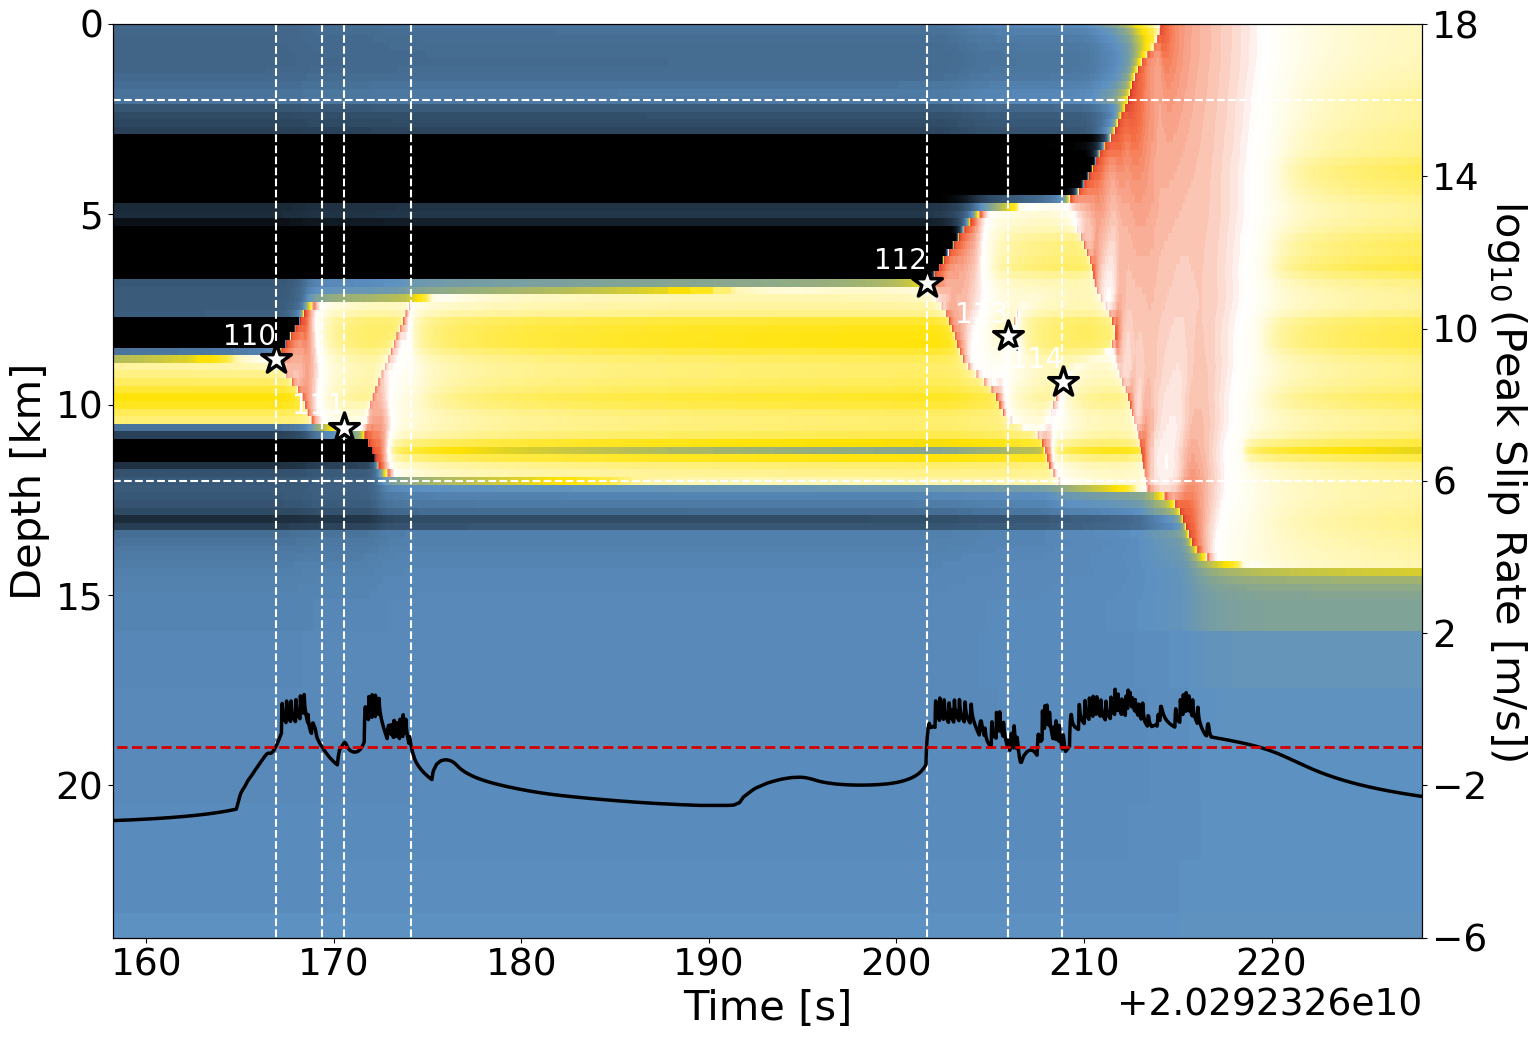

In [6]:
save_on = 0
X,Y,var,lab = get_var(sliprate=True,shearT=False,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=False,plot_in_sec=True)
# X,Y,var,lab = get_var(sliprate=False,shearT=True,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=False,plot_in_sec=True)

plt.rcParams['font.size'] = '27'
fig,ax=plt.subplots(figsize=(16,11))

if lab == 'sliprate':
    vmin = 1e-12; vmax = 1e1
    cmap_n,cb_label = gen_cmap_sr(vmin,vmax,Vths)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,norm=mpl.colors.LogNorm(vmin,vmax))
    acolor = 'w'
elif lab == 'shearT':
    var = np.array([var[i,:]-var[i,0] for i in range(var.shape[0])])
    # vmin = var.min(); vmax = var.max()
    vmin = -5; vmax = 5
    cmap_n,cb_label = gen_cmap_tau(vmin,vmax)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,vmin=vmin,vmax=vmax)
    acolor = 'k'

width = np.round(time[0][ite]-time[0][its])
xl = time[0][its]-width/6,time[0][ite]+width/6
# xl = time[0][its-int(buffer1)],time[0][ite+int(buffer2/7)]
plt.scatter(time[0][its_all],evdep,s=500,marker='*',facecolor='w',edgecolor='k',lw=2.5,zorder=3)
plt.vlines(x=time[0][its_all[ievs:ieve]],ymin=0,ymax=Hs[0],linestyles='--',color=acolor,lw=1.5)
plt.vlines(x=time[0][ite_all[ievs:ieve]],ymin=0,ymax=Hs[0],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[1],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
# plt.hlines(y=Hs[1]+Hs[2],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[-1],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
for k,evts in enumerate(its_all):
    if evts>=its-buffer1 and evts<=ite+buffer2:
        plt.text(time[0][evts],evdep[k]-0.2,'%d'%(k),color=acolor,fontsize=20,ha='right',va='bottom')
# plt.text(time[0][its]+width/18,23,'Event %d'%(iev),fontsize=30,fontweight='bold',color=acolor,ha='left',va='bottom')
plt.xlim(xl)
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.ylabel('Depth [km]',fontsize=30)
plt.xlabel('Time [s]',fontsize=30)

ax2 = ax.twinx()
if lab == 'sliprate':
    var = np.log10(np.max(sr[:,its-buffer1:ite+buffer2],axis=0))
    ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    # hy = -2
    hy = np.log10(Vths)
    ytick_inc = 4
    yl = [-6,18]
elif lab == 'shearT':
    var = abs(shearT[:,its-buffer1:ite+buffer2])
    var = np.array([var[i,:]-shearT[i,0] for i in range(var.shape[0])])
    var = np.max(var,axis=0)
    ylab = 'Peak Shear Stress Change [MPa])'
    hy = []
    ytick_inc = 10
    # yl = [30,100]
    yl = [-5,65]
t = time[0][its-buffer1:ite+buffer2]
ax2.plot(t,var,'k',lw=2.5)
ax2.hlines(y=hy,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
ax2.set_ylabel(ylab,fontsize=30,rotation=270,labelpad=30)
ax2.set_yticks(np.arange(yl[0],yl[1]+ytick_inc,ytick_inc))
ax2.set_ylim(yl)

plt.tight_layout()
if save_on:
    plt.savefig('%s/withPEAK_zoom_%s_image_ev%dto%d_updated.png'%(save_dir,lab,ievs,ieve),dpi=300)


# Appendix: Vths from Barbot (2019)

In [ ]:
# Vbarbot = 2*Vs*(b-a)*sigma_n/mu
mu = params.item().get('mu')
rho = params.item().get('rho0')
Vs = np.sqrt(mu/rho)
print(Vs)

mesh_y,_a,_b,_ab,_sigma,_Dc = ch.make_uniform(prefix)
VW = np.where(_ab<0)[0]
aa = _a[VW]; bb = _b[VW]; mesh_y = mesh_y[VW]; sigma_n = _sigma[VW]; D_c = _Dc[VW]

Vbarbot = 2*Vs*(bb-aa)*sigma_n/mu

plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(figsize=(3.5,7))

ax.plot(Vbarbot,-mesh_y,color='k',lw=3,label='a/b',zorder=3)
print('Vbarbot = %2.3f - %2.3f m/s'%(min(Vbarbot),max(Vbarbot)))
ax.set_xlabel('Vbarbot [m/s]',fontsize=17)
ax.set_ylabel('Depth [km]',fontsize=17)
ax.set_xscale('log')
xl = ax.get_xlim()
# ax.set_xlim(0,xl[1])
# ax.set_xlim(0,500)
ax.set_ylim(0,24)
ax.invert_yaxis()
ax.grid(True)
if max(D_c)-min(D_c) > 1e-4:
    ax.text(xl[0]*2,23,'Mu = %dGPa\nDc: fractal\nMin. %2.2e m/s\nMax. %2.2e m/s'%(mu,min(Vbarbot),max(Vbarbot)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)
else:
    ax.text(xl[0]*2,23,'Mu = %dGPa\nDc = %2.2f mm\nMin. %2.2e m/s\nMax. %2.2e m/s'%(mu,min(D_c*1e3),min(Vbarbot),max(Vbarbot)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)

plt.tight_layout()
plt.show()